In [1]:
# Import of the necessary libraries
import pandas as pd
import numpy as np
from numpy import math

import warnings
warnings.filterwarnings("ignore")


from pca import pca

## Accuracy
from sklearn.metrics import mean_squared_error

## Building Model

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
# import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Data Visualization
import seaborn as sn
import matplotlib.pyplot as plt

## Multidimensional Scaling
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## 2) Linear Regression (LR) on clinical_trajectories data

I am intersetd to see whether we can predict the "**age_at_death**" of a particular patient based on given clinical symptoms. 

**Linear regression** analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable(Y). The variable you are using to predict the other variable's value is called the independent variable(X).

I choose "age_at_death" as the dependent variable (Y), and all the clinical symptoms as the independent variable(X). and I will perform simple linear regression.


In [69]:
# https://www.youtube.com/watch?v=VCVhwjbI6h8

In [70]:
clinical_trajectories_df = pd.read_excel('clinical_trajectories_df.xlsx', sheet_name=0)
# df_main.head(10)

In [88]:
df = clinical_trajectories_df

In [89]:
# clinical_trajectories_df.head(10)

In [90]:
drop_list = [
    "DonorID", "neuropathological_diagnosis", "Gender", "Year_donor_death", 
    "Year", "Age", "year_before_death", "chars_in_clin" 
]


df = df.drop(drop_list, axis=1)

# clinical_trajectories_df = clinical_trajectories_df.dropna()
# df.reset_index(drop=True, inplace=True)
df.head(10)

,age_at_death,Muscular_Weakness,Spasticity,Hyperreflexia_and_oth_reflexes,Fasciculations,Positive_sensory_symptoms,Negative_sensory_symptoms,Parkinsonism,Facial_masking,Tremor,...,Orthostatic_hypotension,Headache_migraine,Fatigue,Declined_deteriorated_health,Cachexia,Weight_loss,Reduces_oral_intake,Help_in_ADL,Day_care,Admission_to_nursing_home
0,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,21,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Codes to perform linear regression:

In [105]:
# Define dependent and independent variables

dependent_variable = "age_at_death"

independent_variables = df.columns.tolist()
independent_variables.remove(dependent_variable)

# independent_variables

In [97]:
# Create data of independent variables
X = df[independent_variables].values

# Create data of dependent variable
y = df[dependent_variable].values

In [98]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [99]:
# Transforming the data
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [100]:
# X_train = X_train[0:10]
# X_train

### Performing Linear Regression

In [108]:
# Fittin linear regression to the training data
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [109]:
#Prediting the training dataset
y_predict = regression.predict(X_test)
y_predict

array([75.47168   , 75.47168   , 76.42141171, ..., 75.02324607,
       71.13150016, 76.54884545])

In [110]:
math.sqrt(mean_squared_error(y_test, y_predict))

12.293939409265654

In [111]:
r2_score(y_test, y_predict)

0.09304845886563706

In [118]:
len(y_train), len(y_predict)

(24319, 6080)

In [120]:
len(X_test), len(X_train), len(y_train), len(y_test)

(6080, 24319, 24319, 6080)

In [123]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

ValueError: x and y must be the same size

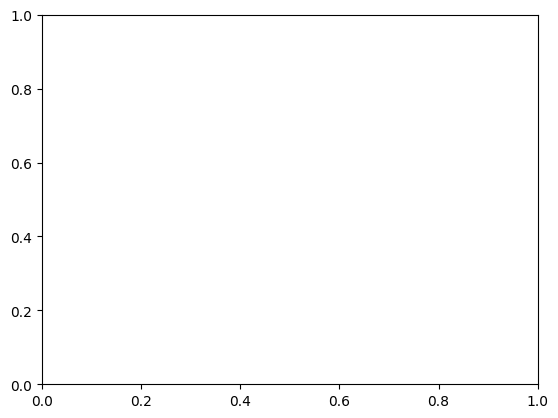

In [127]:
plt.scatter(y_train, y_test)
# plt.plot(X_train, y_train, color='red')
plt.show()